<a href="https://colab.research.google.com/github/Ezzeldin-nasser939/Accident_detection_CNN_model/blob/main/Test_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

import os
import csv

import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
preTrainedModel = InceptionV3(weights='imagenet', include_top=False)

with open('/content/drive/MyDrive/Nour/InceptionV3_weights_Fine-Tuned_Accident_Non-Accident.pkl', 'rb') as f:
    desired_weights_loaded = pickle.load(f)

preTrainedModel.set_weights(desired_weights_loaded)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
from keras.models import load_model

model_ = load_model('/content/drive/MyDrive/Conv2.h5', compile = False)

In [ ]:
# from keras.models import load_model

# model_ = load_model('E:/Nour_/FCAI/4.2/GP/Nour_model/Saved_models/Acciedent_detection.h5', compile = False)

In [ ]:
def prepere_input (sample_path, preTrainedModel):
  image_names = []

  for image_name in os.listdir(sample_path):
    if (image_name != '.ipynb_checkpoints'):
      image_name = os.path.splitext(image_name)[0]
      image_names.append(image_name)

  image_names.sort(key=int)
  print(image_names)


  list_of_np = []

  for image_name in image_names:
    print("The image number :",image_name )
    image_name_wExtention = image_name + '.jpg'
    img_path = sample_path + '/' + image_name_wExtention

    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = preTrainedModel.predict(x)

    features = features.reshape(8, 8, 2048)     # now we have np array with shape (8,8,2048)

    list_of_np.append(features)

  list_of_np = np.array(list_of_np)       # now we have np with shape (4,8,8,2048)
  list_of_np = np.expand_dims(list_of_np, axis=0)




  return list_of_np

In [ ]:
Acc_folder = '/content/drive/MyDrive/New_Data_videos/Good_Quality/'
Non_folder = '/content/drive/MyDrive/Nour/Non-Accident/'

In [ ]:
y_hat_acc = []
for i in os.listdir(Acc_folder):
    sample_path = Acc_folder+i
    feature_map = prepere_input (sample_path, preTrainedModel)
    pred = model_.predict(feature_map)
    pred = (pred >= 0.5).astype(int)
    y_hat_acc.append(pred)


y_hat_Non = []
for i in os.listdir(Non_folder):
    sample_path = Non_folder+i
    feature_map = prepere_input (sample_path, preTrainedModel)
    pred = model_.predict(feature_map)
    pred = (pred >= 0.5).astype(int)
    y_hat_Non.append(pred)


Streaming output truncated to the last 5000 lines.
The image number : 81
1/1 [==============================] - 0s 250ms/step
The image number : 82
1/1 [==============================] - 0s 244ms/step
The image number : 83
1/1 [==============================] - 0s 249ms/step
The image number : 84
1/1 [==============================] - 0s 257ms/step
The image number : 85
1/1 [==============================] - 0s 252ms/step
The image number : 86
1/1 [==============================] - 0s 272ms/step
The image number : 87
1/1 [==============================] - 0s 253ms/step
The image number : 88
1/1 [==============================] - 0s 246ms/step
The image number : 89
1/1 [==============================] - 0s 267ms/step
The image number : 90
1/1 [==============================] - 0s 241ms/step
The image number : 91
1/1 [==============================] - 0s 250ms/step
The image number : 92
1/1 [==============================] - 0s 264ms/step
The image number : 93
1/1 [======================

In [ ]:
y_hat_acc = np.array(y_hat_acc)
y_hat_acc = np.squeeze(y_hat_acc)
y_hat_Non = np.array(y_hat_Non)
y_hat_Non = np.squeeze(y_hat_Non)

print(y_hat_acc)
print(y_hat_Non)

[0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0]
[1 1 1 1 0 1 1 1 1 1]


In [ ]:
y_hat_acc.shape

(21,)

In [ ]:
y_hat_Non.shape

(10,)

In [ ]:
y_acc = np.ones((21,),dtype = int)
y_non = np.zeros((10,),dtype = int)

In [ ]:

y_hat = np.concatenate((y_hat_acc, y_hat_Non))
y = np.concatenate(( y_acc,  y_non))

print(y_hat.shape)
print(y_hat.shape)

(31,)
(31,)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
! pip install scikit-learn

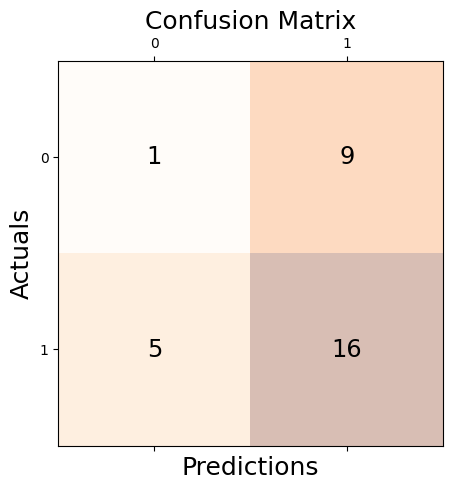

In [ ]:
conf_matrix = confusion_matrix(y_true=y , y_pred=y_hat)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
recall_score = recall_score(y ,y_hat)
precision_score = precision_score(y , y_hat)
f1_score = f1_score(y , y_hat)
accuracy_score = accuracy_score(y , y_hat)

print("recall_score = ",round((recall_score), 2),'\n')
print("precision_score = ",round((precision_score), 2),'\n')
print("f1_score = ",round((f1_score), 2),'\n')
print("accuracy_score = ",round((accuracy_score), 2),'\n')

recall_score =  0.76 

precision_score =  0.64 

f1_score =  0.7 

accuracy_score =  0.55 

